PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Accuracy Score: 0.7932960893854749
Precision Score: 0.7666666666666667
Recall Score: 0.6666666666666666
F1 Score: 0.7131782945736435

Confusion Matrix:
 [[96 14]
 [23 46]]


/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


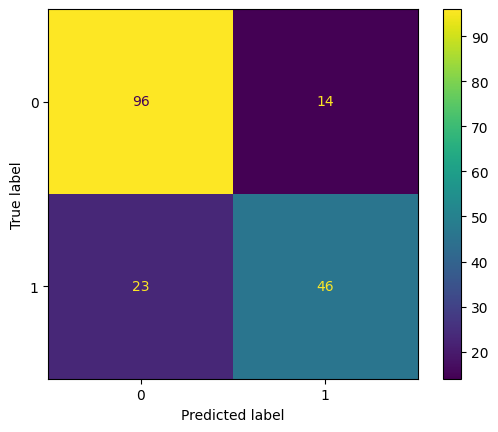

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_df = pd.read_csv('train.csv')

# Check for missing values
print(titanic_df.isnull().sum())

# Drop irrelevant columns
titanic_df = titanic_df.drop(columns=['Cabin', 'Name', 'Ticket'])

# Fill missing values in 'Age' with the median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Check for missing values again
print(titanic_df.isnull().sum())

# Fill missing 'Embarked' values with the mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Verify that no missing values remain
print(titanic_df.isnull().sum())

# Display dataset columns
print(titanic_df.columns)

# One-Hot Encoding for 'Sex' and 'Embarked'
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Define features and target variable
X_data = titanic_df.drop('Survived', axis=1)
y_label = titanic_df['Survived']

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler_model = StandardScaler()
numeric_features = ['Age', 'Fare']
X_data[numeric_features] = scaler_model.fit_transform(X_data[numeric_features])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_predicted = logistic_classifier.predict(X_test)

# Evaluate model performance
print('Accuracy Score:', accuracy_score(y_test, y_predicted))
print('Precision Score:', precision_score(y_test, y_predicted))
print('Recall Score:', recall_score(y_test, y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted))
print()
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predicted))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predicted)).plot()
plt.show()

# Save trained model as a pickle file
import pickle
pickle.dump(logistic_classifier, open('titanic_survival_model.pkl', 'wb'))